In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/mnist-train-dataset/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:

test = pd.read_csv('/kaggle/input/testing-dataset/test.csv')
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train=np.array(train)
m,n=train.shape
np.random.shuffle(train)

test = train[0:1000].T
l_test = test[0]
v_test = test[1:n]
v_test = v_test / 255.

train = train[1000:m].T
label_train = train[0]
value_train = train[1:n]
value_train = value_train / 255.
_,m_train = value_train.shape

In [5]:
def initial_parameters():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [6]:
def ReLU(Z):
    return np.maximum(0,Z)

In [7]:
def forward_prop(W1, b1, W2, b2, X):
    Z1= np.dot(W1,X) + b1
    A1=ReLU (Z1)
    Z2= np.dot(W2,A1) + b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2    

In [8]:
def true_value(Y):
    true_value = np.zeros((Y.size, Y.max() + 1))
    true_value[np.arange(Y.size), Y] = 1
    true_value = true_value.T
    return true_value

In [9]:
def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [10]:
def backward_prop(Z1,Z2, A1, A2,W2, X, Y):
    tv = true_value(Y)
    dZ2 = A2 - tv
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [11]:
def update_p(W1, b1, W2, b2, dW1, dW2, db1, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2    

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initial_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, Z2, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_p(W1, b1, W2, b2, dW1, dW2, db1, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(value_train, label_train, 0.3 ,1001)

Iteration:  0
[0 3 7 ... 1 0 7] [3 2 2 ... 5 6 6]
0.12865853658536586
Iteration:  100
[6 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.8797560975609756
Iteration:  200
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9092439024390244
Iteration:  300
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9232926829268293
Iteration:  400
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9326341463414635
Iteration:  500
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9392439024390243
Iteration:  600
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9449024390243902
Iteration:  700
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9486829268292682
Iteration:  800
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9519512195121951
Iteration:  900
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9552439024390244
Iteration:  1000
[3 2 2 ... 5 6 6] [3 2 2 ... 5 6 6]
0.9584878048780487


In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions
 
def test_prediction(index, W1, b1, W2, b2):
    current_image = value_train[:, index, None]
    prediction = make_predictions(value_train[:, index, None], W1, b1, W2, b2)
    label = label_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


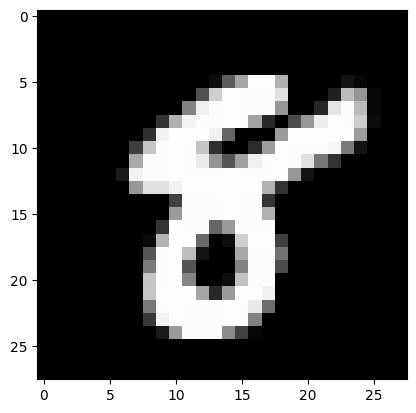

Prediction:  [6]
Label:  6


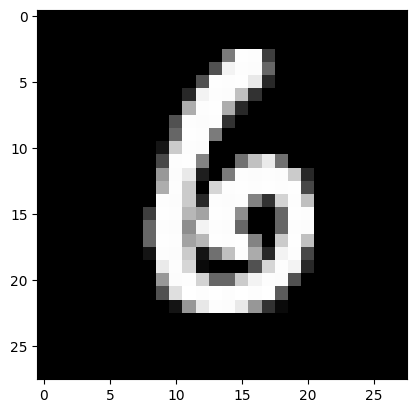

Prediction:  [8]
Label:  8


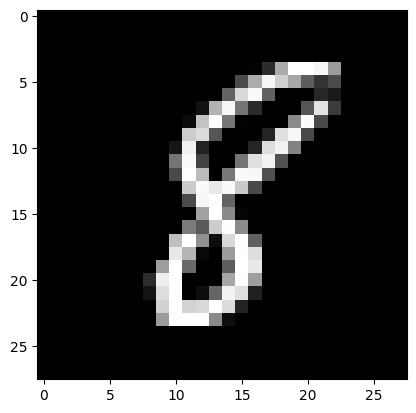

Prediction:  [6]
Label:  6


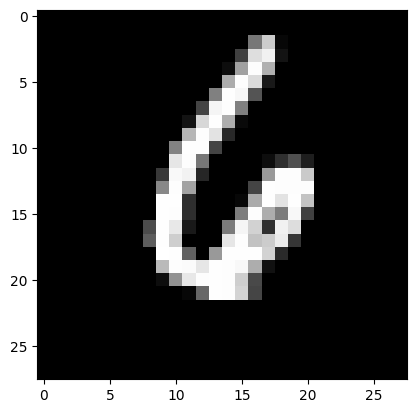

In [15]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(150, W1, b1, W2, b2)
test_prediction(69, W1, b1, W2, b2)
test_prediction(420, W1, b1, W2, b2)

In [16]:
dev_predictions = make_predictions(v_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, l_test)

[0 0 7 3 3 4 5 7 2 1 3 0 2 8 7 5 6 1 8 6 6 9 1 6 7 3 8 8 2 8 9 9 1 9 7 9 2
 9 3 5 7 0 9 1 9 6 8 8 3 3 4 2 1 7 4 2 3 8 4 2 3 7 7 0 5 7 6 7 6 0 7 0 0 9
 9 9 2 8 3 4 5 7 6 1 1 1 8 2 7 6 9 0 5 9 0 1 7 1 5 7 9 6 2 7 8 5 6 7 5 2 3
 1 3 3 8 7 4 3 1 1 6 7 6 3 2 1 5 9 9 2 7 8 7 5 7 3 8 4 5 2 1 6 9 2 6 4 7 1
 4 3 0 7 1 2 9 2 1 3 8 0 1 3 0 2 9 8 2 6 6 4 6 7 1 4 3 6 3 9 8 2 6 9 1 7 9
 2 9 3 3 3 9 2 0 4 3 1 7 9 8 7 3 1 1 9 2 5 0 8 8 9 3 1 3 4 1 7 3 9 2 4 0 9
 6 2 7 7 5 4 8 9 0 6 1 6 6 7 2 4 4 6 6 9 0 1 8 9 0 5 5 6 6 7 8 4 1 9 9 0 5
 4 1 0 1 5 3 6 5 7 3 2 3 7 1 4 1 5 5 2 8 5 3 1 1 9 6 4 0 1 7 9 2 1 8 1 9 8
 1 3 0 8 9 6 1 5 6 6 0 4 0 0 0 7 5 4 9 4 1 6 6 6 5 0 3 0 5 5 6 9 4 5 2 9 7
 0 1 1 7 1 4 6 2 9 0 5 9 5 2 2 4 3 1 3 0 4 8 6 1 3 4 5 5 8 6 0 9 9 9 9 2 1
 1 6 3 1 6 8 7 8 2 7 5 6 2 1 2 3 4 4 1 1 2 2 2 2 4 3 0 3 8 0 2 0 7 8 6 3 9
 3 3 9 0 3 6 9 3 9 2 4 9 9 1 1 0 9 0 0 5 9 4 8 8 7 7 6 8 8 7 1 6 0 1 4 7 5
 1 2 2 0 0 5 3 9 7 4 8 4 0 9 5 6 7 8 7 2 6 6 8 1 0 9 0 8 1 6 2 9 8 5 1 3 3
 7 4 7 1 7 2 1 7 2 2 6 3 

0.949